<a href="https://colab.research.google.com/github/thavaneshkrishnamattegunta/Machine-Learning-LAB/blob/main/NaiveBayes_Resume(AP23110010619).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 80.5 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00


In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
df=pd.read_csv('/content/resume.csv', encoding='latin1')

In [ ]:
df.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_id    125 non-null    object
 1   class        125 non-null    object
 2   resume_text  125 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [ ]:
display(df.isnull().sum())

,0
resume_id,0
class,0
resume_text,0


In [ ]:
df['class'].value_counts()

,count
class,
not_flagged,92
flagged,33


In [ ]:
df['class'] = df['class'].apply(lambda x:1 if x == 'flagged' else 0)

In [ ]:
df['resume_text'] = df['resume_text'].apply(lambda x: x.replace('\r', ''))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'email', 'com'])

In [ ]:
# Remove stop words and remove words with 2 or Less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

In [ ]:
df['cleaned'] = df['resume_text'].apply(preprocess)

In [ ]:
df.head()

,resume_id,class,resume_text,cleaned
0,resume_1,0,Customer Service Supervisor/Tier - Isabella Ca...,customer service supervisor tier isabella cata...
1,resume_2,0,Engineer / Scientist - IBM Microelectronics Di...,engineer scientist ibm albert gregoritsch ecaw...
2,resume_3,0,LTS Software Engineer Computational Lithograph...,lts software engineer computational lithograph...
3,resume_4,0,TUTORWilliston VT - Email me on Indeed: indee...,tutorwilliston alec schwartz awork college bio...
4,resume_5,1,Independent Consultant - Self-employedBurlingt...,independent consultant self alex reutter fefwo...


In [ ]:
print(df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [ ]:
print(df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

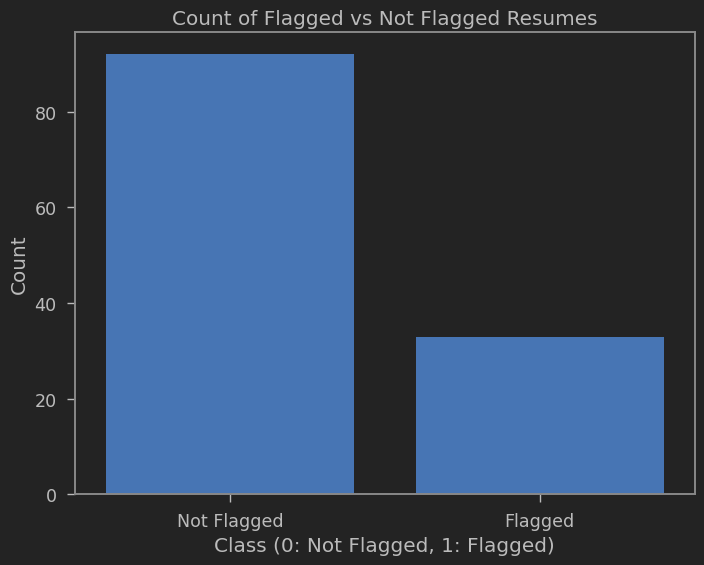

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Count of Flagged vs Not Flagged Resumes')
plt.xlabel('Class (0: Not Flagged, 1: Flagged)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Flagged', 'Flagged'])
plt.show()

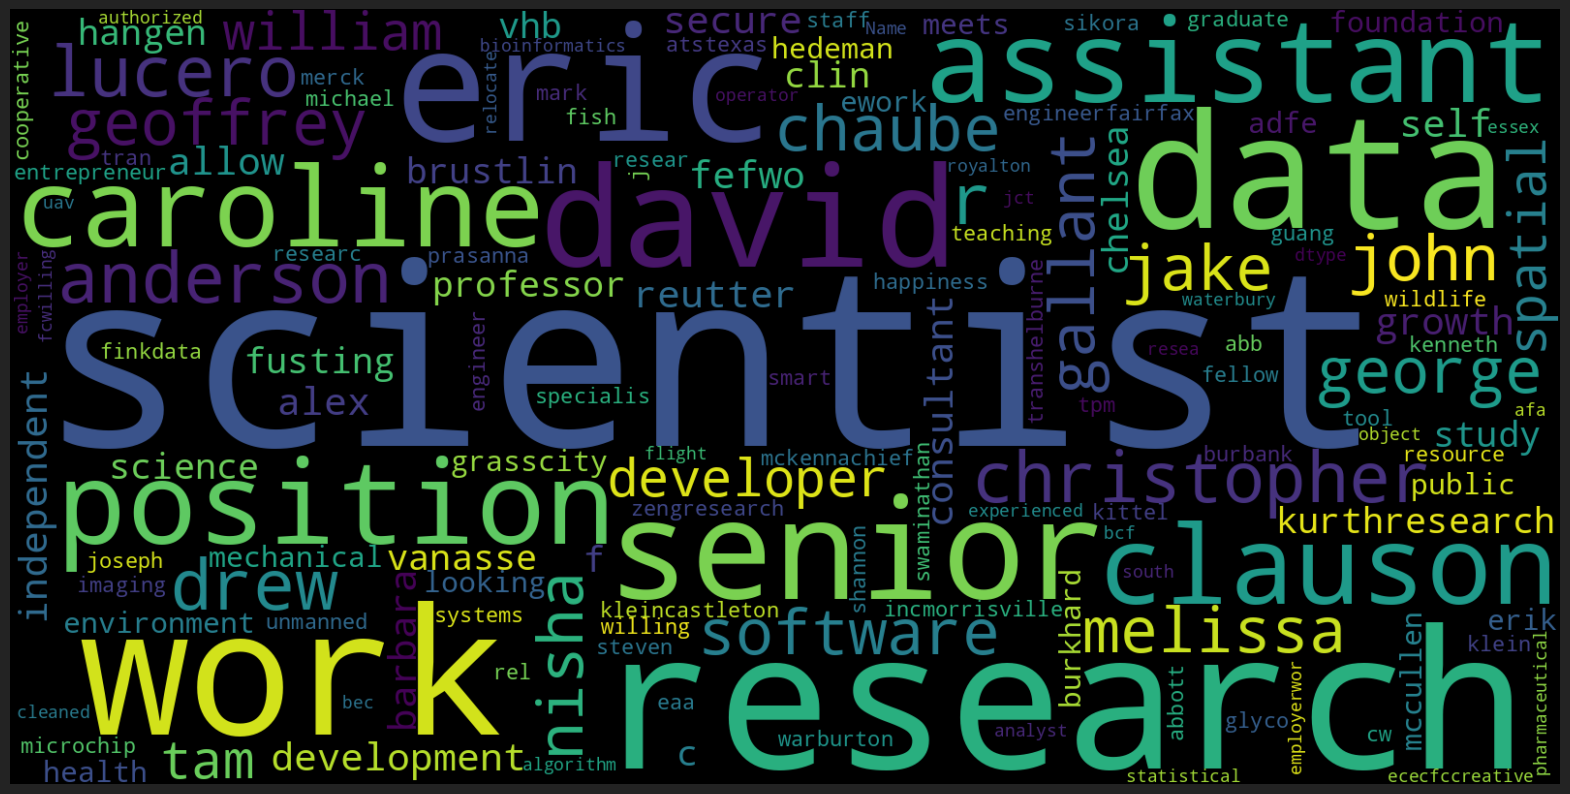

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(df[df['class']==1].cleaned));
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(df['cleaned'])

In [ ]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
CountVectorizer

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
x=CountVectorizer

In [ ]:
y=df['class']

In [ ]:
X.shape

(4, 9)

In [ ]:
y.shape

(125,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(countvectorizer, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
X_train.shape

(100, 11314)

In [ ]:
X_test.shape

(25, 11314)

<Axes: >

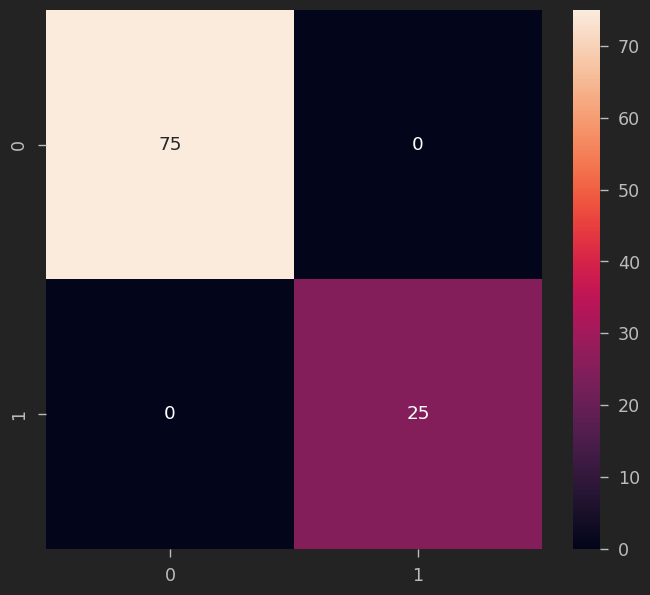

In [ ]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

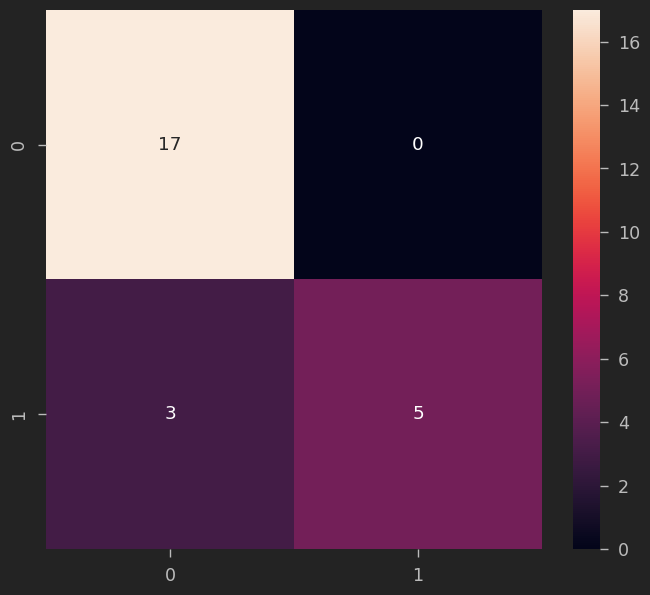

In [ ]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.62      0.77         8

    accuracy                           0.88        25
   macro avg       0.93      0.81      0.84        25
weighted avg       0.90      0.88      0.87        25

